In [28]:
import sys
sys.path.append('C:/Users/pradnya.gade/Projects')

from pydiSQL import pull_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
query = """
SELECT DISTINCT(sus.school_id),
               du.user_id,
               cco.neat_career_category AS career,
               dc.country
FROM analytics.sub_ux_school AS sus
	LEFT JOIN twinkl.twinkl_school_user AS tsu
		ON sus.school_id = tsu.school_id
	LEFT JOIN analytics.dx_user AS du
		ON tsu.user_id = du.user_id
	LEFT JOIN analytics.career_category_overview AS cco
		ON du.career_category_id = cco.id
	LEFT JOIN analytics.dx_country AS dc
		ON du.country_id = dc.country_id
WHERE CURDATE() BETWEEN sus.ux_start_date AND sus.ux_end_date;
"""

In [32]:
df = pull_data(query)

Server connected via SSH


In [34]:
df.head(100)

,school_id,user_id,career,country
0,1,696515.0,EAL Teacher,Scotland
1,1,696516.0,Home Educator,Scotland
2,1,1234421.0,Trainee,Scotland
3,1,4128677.0,SEN Teacher,Scotland
4,1,14483764.0,KS1 Teacher (or equivalent),Scotland
...,...,...,...,...
95,38,895516.0,Speech and Language therapist,England
96,38,3892018.0,Early Years Teacher,England
97,38,3892019.0,KS1 Teacher (or equivalent),England
98,38,4971444.0,KS1 Teacher (or equivalent),England


In [40]:
len(df)

194752

In [38]:
df.country.nunique()

159

In [44]:
df.career.nunique()

32

In [49]:
df[df.user_id.isnull()]

,school_id,user_id,career,country
1232,188,NaN,None,None
2425,386,NaN,None,None
3170,491,NaN,None,None
5757,785,NaN,None,None
8824,1144,NaN,None,None
...,...,...,...,...
192957,24244,NaN,None,None
193673,24342,NaN,None,None
194089,24398,NaN,None,None
194548,24453,NaN,None,None


In [51]:
df[df.school_id == 188]

,school_id,user_id,career,country
1232,188,NaN,None,None
1233,188,433018.0,Early Years Teacher,England
1234,188,433019.0,KS3 Teacher (or equivalent),England
1235,188,433023.0,KS2 Teacher (or equivalent),England
1236,188,433025.0,KS2 Teacher (or equivalent),England
1237,188,433027.0,KS1 Teacher (or equivalent),England
1238,188,1101463.0,KS2 Teacher (or equivalent),England
1239,188,1109384.0,Teaching Assistant,England
1240,188,1289210.0,KS2 Teacher (or equivalent),England
1241,188,1327558.0,KS2 Teacher (or equivalent),England


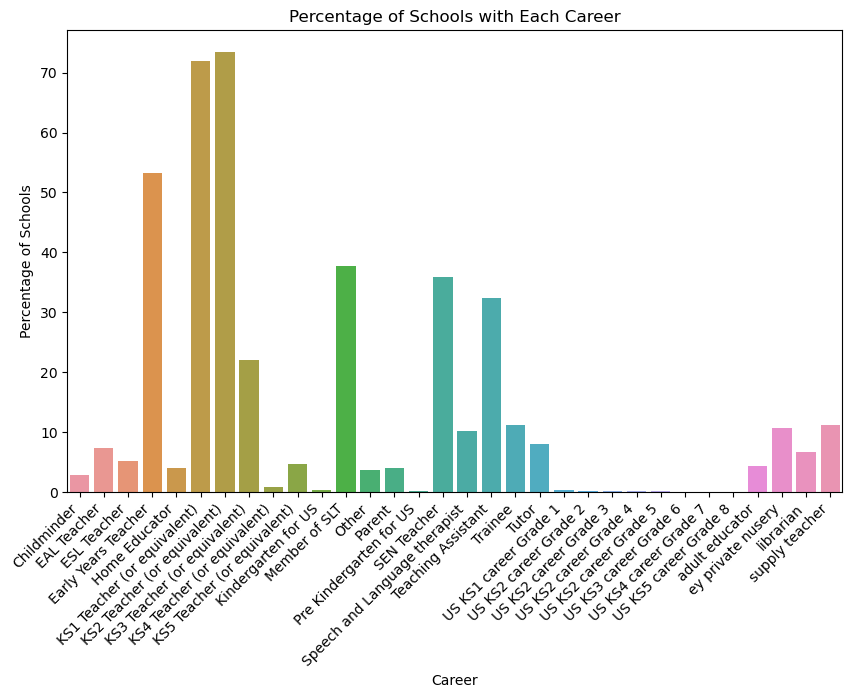

In [55]:
# Career breakdown of active schools
career_breakdown = df.groupby('career')['school_id'].nunique() / df['school_id'].nunique() * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=career_breakdown.index, y=career_breakdown.values)
plt.title('Percentage of Schools with Each Career')
plt.xlabel('Career')
plt.ylabel('Percentage of Schools')
plt.xticks(rotation=45, ha='right')
plt.show()